In [2]:
import tensorflow as tf

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Display GPU details
        for i, gpu in enumerate(gpus):
            device_details = tf.config.experimental.get_device_details(gpu)
            print(f"GPU {i}: {device_details.get('device_name', 'Unknown GPU')}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found.")

if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])  # Set memory limit in MB
    except RuntimeError as e:
        print(e)


GPU 0: NVIDIA GeForce RTX 4080 Laptop GPU


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE  # For oversampling

# Load your dataset (ensure it's in CSV format)
data = pd.read_csv('SniperDataset.csv')


In [4]:
X = data[['DistanceFromTarget', 'ElevationDifference', 'GunTiltX', 'GunTiltY', 
          'XDifference', 'YDifference', 'Zdifference']]
y = data['HitOrMiss']

# Use SMOTE to oversample the minority class (1s)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify that the number of samples for both classes is now equal
print(f"Number of 1s: {sum(y_resampled == 1)}, Number of 0s: {sum(y_resampled == 0)}")

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Number of 1s: 16098, Number of 0s: 16098


In [5]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # X_train.shape[1] = number of features

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (binary classification: hit or miss)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/home/abhiram/Documents/clg/ml/sniper/nn_model/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732947713.674936    6399 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1024 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [6]:
import joblib

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)
joblib.dump(scaler, 'scaler.pkl')
model.save('sniper_model.keras.h5')  # Save model in HDF5 format

Epoch 1/30


I0000 00:00:1732947714.869526    6588 service.cc:148] XLA service 0x70345800b080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732947714.869625    6588 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2024-11-30 11:51:54.889041: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732947714.988354    6588 cuda_dnn.cc:529] Loaded cuDNN version 90501


201/805 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6252 - loss: 0.6436

I0000 00:00:1732947715.555001    6588 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7560 - loss: 0.5138 - val_accuracy: 0.8930 - val_loss: 0.2882
Epoch 2/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8956 - loss: 0.2816 - val_accuracy: 0.9020 - val_loss: 0.2584
Epoch 3/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.2584 - val_accuracy: 0.9053 - val_loss: 0.2521
Epoch 4/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9064 - loss: 0.2454 - val_accuracy: 0.9031 - val_loss: 0.2597
Epoch 5/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2450 - val_accuracy: 0.9039 - val_loss: 0.2518
Epoch 6/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9102 - loss: 0.2370 - val_accuracy: 0.9087 - val_loss: 0.2418
Epoch 7/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9108 - loss: 0.2368 - val_accuracy: 0.9061 - val_loss: 0.2547
Epoch 8/30
805/805 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9067 - loss: 0.2444 - val_accuracy: 0.9070 - val_

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9081 - loss: 0.2429
Test Accuracy: 0.9104


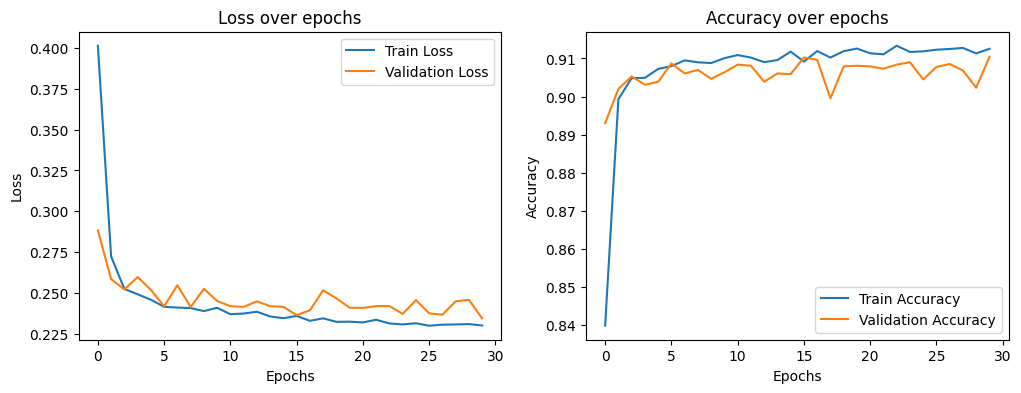

In [8]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [9]:
# Predict on new data
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predicted_classes.flatten()})
print(comparison.head())


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       0          0
4       0          0


In [10]:
# Function to preprocess the input data and make predictions
def predict_hit_or_miss(input_data):
    # Convert the input data string into a numpy array of floats
    input_values = np.array([list(map(float, input_data.split(',')))])

    # Normalize the input using the same scaler used during training
    input_scaled = scaler.transform(input_values)

    # Predict using the model
    prediction = model.predict(input_scaled)

    # Convert the prediction to binary class (0 = Miss, 1 = Hit)
    predicted_class = (prediction > 0.5).astype(int)

    # Print the predicted probability and class
    print(f"Predicted Probability: {prediction[0][0]:.2f}")
    print(f"Predicted Class: {'Hit' if predicted_class[0][0] == 1 else 'Miss'}")

# Example: You can copy-paste your input data as a comma-separated string
input_data = "53.6754,1.475897,76.90024,60.77032,27.54746,1.475897,46.04354"  # New input data as string

# Call the prediction function
predict_hit_or_miss(input_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Probability: 0.72
Predicted Class: Hit


/home/abhiram/Documents/clg/ml/sniper/nn_model/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
